In [24]:
import cv2
import numpy as np
import pandas as pd
import os
import sys
import time
import matplotlib.pyplot as plt
import scipy


In [2]:
checkboard = cv2.imread('./calib-object.jpg')
checkboard = cv2.cvtColor(checkboard, cv2.COLOR_BGR2RGB)

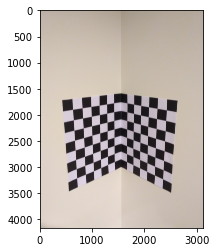

In [3]:
plt.imshow(checkboard, cmap='gray')

In [18]:
edges = cv2.Canny(checkboard, 150, 200)

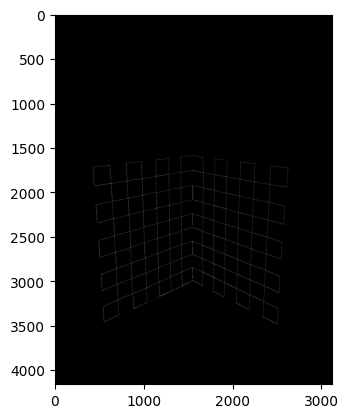

In [19]:
plt.imshow(edges, cmap='gray')

In [64]:
# import cv2
# import numpy as np
# import math

# # Load the image
# image = cv2.imread('./calib-object.jpg')

# # Convert the image to gray scale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Perform edge detection
# edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# # Perform a Hough Line Transform
# lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=10, maxLineGap=250)
# # lines = cv2.HoughLines(edges, 1, np.pi / 180, 100, None, 0,0)

# # # Draw lines on the image
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # if lines is not None:
# #     for i in range(0, len(lines)):
# #         rho = lines[i][0][0]
# #         theta = lines[i][0][1]
# #         a = math.cos(theta)
# #         b = math.sin(theta)
# #         x0 = a * rho
# #         y0 = b * rho
# #         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
# #         cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


# # Show the image
# plt.imshow(image)

In [4]:
checkboard_split_left = cv2.cvtColor(cv2.imread('./calib-object.jpg'), cv2.COLOR_BGR2RGB)
checkboard_split_left = checkboard_split_left[:, 0:checkboard_split_left.shape[1]//2]
ret, corners1 = cv2.findChessboardCorners(checkboard_split_left, (6,8),None)

In [5]:
for i in corners1:
    print(i)

[[ 629. 1904.]]
[[ 808.13416 1872.3228 ]]
[[ 976.6291 1851.3335]]
[[1133.5 1825. ]]
[[1276.4954 1803.9019]]
[[1411.5 1780. ]]
[[ 640.44257 2104.0078 ]]
[[ 819.5 2070. ]]
[[ 983.  2037.5]]
[[1137.3721 2004.9901]]
[[1278.7555 1976.6257]]
[[1413. 1951.]]
[[ 655.  2301.5]]
[[ 830.5 2260. ]]
[[ 990.87225 2218.1711 ]]
[[1142.5 2183. ]]
[[1284. 2149.]]
[[1415.5 2116. ]]
[[ 668. 2491.]]
[[ 839.2853 2446.9954]]
[[ 998.8068 2398.479 ]]
[[1147.892  2354.3228]]
[[1284.1151 2314.248 ]]
[[1415. 2277.]]
[[ 677.294  2680.3662]]
[[ 849.5 2625.5]]
[[1002.5 2572.5]]
[[1147.4066 2523.5688]]
[[1288.0702 2477.4587]]
[[1414. 2442.]]
[[ 689. 2859.]]
[[ 855.28485 2803.543  ]]
[[1011.5 2744. ]]
[[1151.4613 2691.3496]]
[[1289.5 2640.5]]
[[1416. 2592.]]
[[ 699. 3041.]]
[[ 862.  2973.5]]
[[1019.  2913.5]]
[[1162.3546 2855.2683]]
[[1293.454  2797.4604]]
[[1416. 2753.]]
[[ 708.5 3211.5]]
[[ 871. 3142.]]
[[1027.9819 3079.476 ]]
[[1166.5 3015.5]]
[[1296.7518 2954.427 ]]
[[1419. 2899.]]


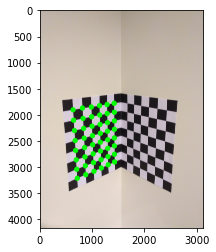

In [6]:
tt1 = checkboard.copy()
for i in corners1:
    cv2.circle(tt1,(int(i[0][0]), int(i[0][1])),50,(0,255,0),-1)
plt.imshow(tt1)

In [7]:
checkboard_split_right = cv2.cvtColor(cv2.imread('./calib-object.jpg'), cv2.COLOR_BGR2RGB)
checkboard_split_right = checkboard_split_right[:, checkboard_split_right.shape[1]//2:]
ret2, corners2 = cv2.findChessboardCorners(checkboard_split_right, (6,8),None)


In [8]:
for i in corners2:
    print(i)

[[ 105.14933 1783.2708 ]]
[[ 232.25006 1806.1473 ]]
[[ 368.50708 1830.9177 ]]
[[ 515.1217 1857.5288]]
[[ 675.5092 1885.4186]]
[[ 850.99774 1916.2145 ]]
[[ 103.06637 1954.8956 ]]
[[ 229.02246 1982.8917 ]]
[[ 362.62088 2013.1603 ]]
[[ 508.51883 2046.6571 ]]
[[ 664.9223 2081.0652]]
[[ 840.8529 2119.256 ]]
[[ 101.208336 2119.286   ]]
[[ 224.50014 2153.4255 ]]
[[ 357.55112 2191.9531 ]]
[[ 499.13632 2230.2815 ]]
[[ 656.7855 2271.988 ]]
[[ 829.95166 2316.2463 ]]
[[ 100.1326 2282.1663]]
[[ 221.0576 2322.267 ]]
[[ 353.88617 2364.7024 ]]
[[ 493.6828 2408.1416]]
[[ 649.403  2459.5183]]
[[ 820.3401 2508.2063]]
[[  98.5 2441.5]]
[[ 219.00615 2486.7412 ]]
[[ 349.61707 2532.0347 ]]
[[ 490.9862 2584.1926]]
[[ 641.9323 2638.3066]]
[[ 809.78345 2697.264  ]]
[[  94.636566 2601.3872  ]]
[[ 215.9262 2648.539 ]]
[[ 346.3697 2700.8728]]
[[ 487.07382 2755.7402 ]]
[[ 635.4275 2817.1035]]
[[ 799.67377 2880.1233 ]]
[[  97. 2752.]]
[[ 218.27953 2806.7131 ]]
[[ 345.9986 2863.5757]]
[[ 483.51608 2923.6536 ]]
[[ 629

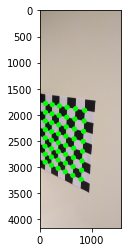

In [11]:
tt2 = checkboard_split_right.copy()
for i in corners2:
    cv2.circle(tt2,(int(i[0][0]), int(i[0][1])),50,(0,255,0),-1)
plt.imshow(tt2)

In [12]:

corners2 = corners2 + np.array([checkboard_split_left.shape[1], 0])

In [13]:
corners = np.concatenate((corners1, corners2))

In [14]:
for i in corners:
    print(i)

[[ 629. 1904.]]
[[ 808.13415527 1872.32275391]]
[[ 976.62908936 1851.33349609]]
[[1133.5 1825. ]]
[[1276.49536133 1803.90185547]]
[[1411.5 1780. ]]
[[ 640.44256592 2104.0078125 ]]
[[ 819.5 2070. ]]
[[ 983.  2037.5]]
[[1137.37207031 2004.9901123 ]]
[[1278.75549316 1976.62573242]]
[[1413. 1951.]]
[[ 655.  2301.5]]
[[ 830.5 2260. ]]
[[ 990.87225342 2218.17114258]]
[[1142.5 2183. ]]
[[1284. 2149.]]
[[1415.5 2116. ]]
[[ 668. 2491.]]
[[ 839.28527832 2446.99536133]]
[[ 998.80682373 2398.47900391]]
[[1147.89196777 2354.32275391]]
[[1284.1151123  2314.24804688]]
[[1415. 2277.]]
[[ 677.29400635 2680.36621094]]
[[ 849.5 2625.5]]
[[1002.5 2572.5]]
[[1147.40661621 2523.56884766]]
[[1288.07019043 2477.45874023]]
[[1414. 2442.]]
[[ 689. 2859.]]
[[ 855.28485107 2803.54296875]]
[[1011.5 2744. ]]
[[1151.46130371 2691.34960938]]
[[1289.5 2640.5]]
[[1416. 2592.]]
[[ 699. 3041.]]
[[ 862.  2973.5]]
[[1019.  2913.5]]
[[1162.35461426 2855.26831055]]
[[1293.45397949 2797.46044922]]
[[1416. 2753.]]
[[ 708.5 321

In [15]:

#make a copy of an image to tt
tt = checkboard.copy()
for i in corners:
    cv2.circle(tt,(int(i[0][0]), int(i[0][1])),50,(0,255,0),-1)

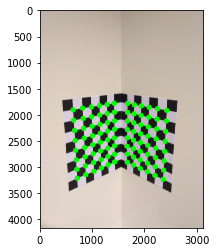

In [16]:
plt.imshow(tt)

In [17]:
print(len(corners1))
print(len(corners2))
print(len(corners))

48
48
96


In [18]:
corr_points = []
z = 0

for k in [corners1, corners2]:
    for i in range(8): # 8 rows
        t = k[i*6:i*6+6] # 6 points in each row
        
        if k is corners1:
            for j in range(len(t)):
                print(t[j][0][0])
                corr_points.append((int(t[j][0][0]), int(t[j][0][1]),j*2, i*2, z))
                
        else:
            for j in range(len(t)):
                print(t[j][0][0])
                corr_points.append((int(t[j][0][0]), int(t[j][0][1]), z, i*2, (j+1)*2))
    z +=12


629.0
808.13416
976.6291
1133.5
1276.4954
1411.5
640.44257
819.5
983.0
1137.3721
1278.7555
1413.0
655.0
830.5
990.87225
1142.5
1284.0
1415.5
668.0
839.2853
998.8068
1147.892
1284.1151
1415.0
677.294
849.5
1002.5
1147.4066
1288.0702
1414.0
689.0
855.28485
1011.5
1151.4613
1289.5
1416.0
699.0
862.0
1019.0
1162.3546
1293.454
1416.0
708.5
871.0
1027.9819
1166.5
1296.7518
1419.0
1665.1493301391602
1792.2500610351562
1928.507080078125
2075.1217041015625
2235.5092163085938
2410.9977416992188
1663.0663681030273
1789.0224609375
1922.6208801269531
2068.518829345703
2224.9223022460938
2400.8529052734375
1661.2083358764648
1784.5001373291016
1917.5511169433594
2059.1363220214844
2216.7855224609375
2389.95166015625
1660.1325988769531
1781.057601928711
1913.8861694335938
2053.6828002929688
2209.4030151367188
2380.340087890625
1658.5
1779.0061492919922
1909.6170654296875
2050.9862060546875
2201.9323120117188
2369.783447265625
1654.6365661621094
1775.9261932373047
1906.3696899414062
2047.0738220214844

In [19]:
# (u, v, X, Y, Z)
for i in corr_points:
    print(i)    

(629, 1904, 0, 0, 0)
(808, 1872, 2, 0, 0)
(976, 1851, 4, 0, 0)
(1133, 1825, 6, 0, 0)
(1276, 1803, 8, 0, 0)
(1411, 1780, 10, 0, 0)
(640, 2104, 0, 2, 0)
(819, 2070, 2, 2, 0)
(983, 2037, 4, 2, 0)
(1137, 2004, 6, 2, 0)
(1278, 1976, 8, 2, 0)
(1413, 1951, 10, 2, 0)
(655, 2301, 0, 4, 0)
(830, 2260, 2, 4, 0)
(990, 2218, 4, 4, 0)
(1142, 2183, 6, 4, 0)
(1284, 2149, 8, 4, 0)
(1415, 2116, 10, 4, 0)
(668, 2491, 0, 6, 0)
(839, 2446, 2, 6, 0)
(998, 2398, 4, 6, 0)
(1147, 2354, 6, 6, 0)
(1284, 2314, 8, 6, 0)
(1415, 2277, 10, 6, 0)
(677, 2680, 0, 8, 0)
(849, 2625, 2, 8, 0)
(1002, 2572, 4, 8, 0)
(1147, 2523, 6, 8, 0)
(1288, 2477, 8, 8, 0)
(1414, 2442, 10, 8, 0)
(689, 2859, 0, 10, 0)
(855, 2803, 2, 10, 0)
(1011, 2744, 4, 10, 0)
(1151, 2691, 6, 10, 0)
(1289, 2640, 8, 10, 0)
(1416, 2592, 10, 10, 0)
(699, 3041, 0, 12, 0)
(862, 2973, 2, 12, 0)
(1019, 2913, 4, 12, 0)
(1162, 2855, 6, 12, 0)
(1293, 2797, 8, 12, 0)
(1416, 2753, 10, 12, 0)
(708, 3211, 0, 14, 0)
(871, 3142, 2, 14, 0)
(1027, 3079, 4, 14, 0)
(1166, 3

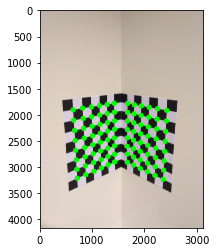

In [20]:

#make a copy of an image to tt
tte = checkboard.copy()
for i in corr_points:
    cv2.circle(tte,(int(i[0]), int(i[1])),50,(0,255,0),-1)
plt.imshow(tte)

In [21]:
G = np.zeros((len(corr_points)*2,12))
for i in range(len(corr_points)):
    G[i*2] = [-corr_points[i][2], -corr_points[i][3], -corr_points[i][4], -1, 0, 0, 0, 0, corr_points[i][0]*corr_points[i][2], corr_points[i][0]*corr_points[i][3], corr_points[i][0]*corr_points[i][4], corr_points[i][0]]
    G[(i*2)+1] = [0, 0, 0, 0, -corr_points[i][2], -corr_points[i][3], -corr_points[i][4], -1, corr_points[i][1]*corr_points[i][2], corr_points[i][1]*corr_points[i][3], corr_points[i][1]*corr_points[i][4], corr_points[i][1]]
_, _, V = np.linalg.svd(G)
print(V.shape)
print((V[-1].reshape(3,4)))  
P = V[-1].reshape(3,4)   


(12, 12)
[[ 5.22105841e-02  4.93980566e-03  2.06814071e-02  3.13667845e-01]
 [ 1.07909294e-02  5.64724541e-02 -1.07386348e-02  9.46051409e-01]
 [ 9.53593189e-06  3.12710272e-06 -9.80556513e-06  4.96839975e-04]]


In [22]:
print(P)

[[ 5.22105841e-02  4.93980566e-03  2.06814071e-02  3.13667845e-01]
 [ 1.07909294e-02  5.64724541e-02 -1.07386348e-02  9.46051409e-01]
 [ 9.53593189e-06  3.12710272e-06 -9.80556513e-06  4.96839975e-04]]


In [26]:
import scipy.linalg
A,R = scipy.linalg.rq(P[:,0:3]) #first three rows for rotation and intrinsics

In [27]:
print(A)
print(R)

[[ 5.18475450e-02 -2.57369734e-04  2.21321757e-02]
 [ 0.00000000e+00 -5.16600677e-02  2.74251329e-02]
 [ 0.00000000e+00  0.00000000e+00  1.40307475e-05]]
[[ 0.71763581 -0.00470217  0.6964027 ]
 [ 0.15192457 -0.97483569 -0.16313888]
 [ 0.67964532  0.22287499 -0.69886263]]


In [28]:
t = np.dot(np.linalg.inv(A), P[:,3]) #last column for translation

In [29]:
print(t)

[-9.06359504  0.48576108 35.41079864]


P = A[R|t]

Camera Projection Matrix

$x_{i}$ = $P$ $\cdot$ $X_{i}$

$x_{i}$ -> 3X1 

$P$ -> 3X4 

$X_{i}$ -> 4X1

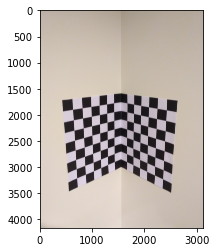

In [30]:
plt.imshow(checkboard)

In [31]:
checkboard_corners_3D = np.array([
                        [-2,-2,0],
                        [12,-2,0],
                        [12,-2,14],
                        [12,16,14],
                        [12,16,0],
                        [-2,16,0]
                        ])

In [32]:
#convert to homogeneous coordinates
checkboard_corners_homo_3D = np.concatenate((checkboard_corners_3D, np.ones((6,1))), axis=1)
print(checkboard_corners_homo_3D)

[[-2. -2.  0.  1.]
 [12. -2.  0.  1.]
 [12. -2. 14.  1.]
 [12. 16. 14.  1.]
 [12. 16.  0.  1.]
 [-2. 16.  0.  1.]]


In [33]:
print(checkboard_corners_homo_3D.T.shape)
print(P.shape)

(4, 6)
(3, 4)


In [34]:
checkboard_corners_homo_2D = np.matmul(P,checkboard_corners_homo_3D.T)
print(checkboard_corners_homo_2D.T)
print(checkboard_corners_homo_2D.shape)


[[1.99367066e-01 8.11524642e-01 4.71513906e-04]
 [9.30315243e-01 9.62597653e-01 6.05016952e-04]
 [1.21985494e+00 8.12256766e-01 4.67739040e-04]
 [1.30877144e+00 1.82876094e+00 5.24026889e-04]
 [1.01923174e+00 1.97910183e+00 6.61304801e-04]
 [2.88283568e-01 1.82802882e+00 5.27801755e-04]]
(3, 6)


$x_{i}$ =[u
          v
          w]

$x_{i}$ is only [u' v']. To get there, we do [$u/w$ $v/w$ $w/w$] to get [$u'$ $v'$ $1$]          

In [35]:
checkboard_corners_2D = checkboard_corners_homo_2D.T[:,0:2]/checkboard_corners_homo_2D.T[:,2:]
print(checkboard_corners_2D)

[[ 422.82330005 1721.10436531]
 [1537.66805904 1591.02592034]
 [2607.98187862 1736.5596965 ]
 [2497.52726444 3489.82271227]
 [1541.24352777 2992.7226054 ]
 [ 546.19668288 3463.47619996]]


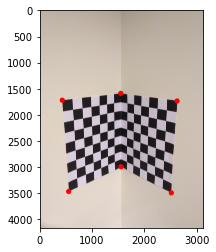

In [36]:
tr = checkboard.copy()
for i in checkboard_corners_2D:
    cv2.circle(tr,(int(i[0]), int(i[1])),50,(255,0,0),-1)
plt.imshow(tr)



In [37]:
checkboard_corners_2D

array([[ 422.82330005, 1721.10436531],
       [1537.66805904, 1591.02592034],
       [2607.98187862, 1736.5596965 ],
       [2497.52726444, 3489.82271227],
       [1541.24352777, 2992.7226054 ],
       [ 546.19668288, 3463.47619996]])

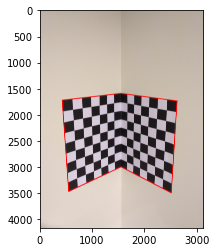

In [38]:
tr = checkboard.copy()
for i in range(len(checkboard_corners_2D)):
    start_point = (int(checkboard_corners_2D[i][0]), int(checkboard_corners_2D[i][1]))
    end_point = (int(checkboard_corners_2D[(i + 1) % len(checkboard_corners_2D)][0]), int(checkboard_corners_2D[(i + 1) % len(checkboard_corners_2D)][1]))
    cv2.line(tr, start_point, end_point, (255,0,0), 15)
plt.imshow(tr)

Rotation angles - to do


# Q2

In [69]:

data = [
    [629, 1904, 0, 0, 0],
    [976, 1851, 4, 0, 0],
    [819, 2070, 2, 2, 0],
    [1413, 1951, 10, 2, 0],
    [1415, 2277, 10, 6, 0],
    [1147, 2354, 6, 6, 0],
    [1151, 2691, 6, 10, 0],
    [689, 2859, 0, 10, 0],
    [1293, 2797, 8, 12, 0],
    [862, 2973, 2, 12, 0],
    [1027, 3079, 4, 14, 0],
    [1166, 3015, 6, 14, 0]
    
]


image_points = np.array([item[:2] for item in data])
world_points = np.array([item[2:] for item in data])

In [70]:
print(world_points)
print(world_points.dtype)
print(image_points)
print(image_points.dtype)

[[ 0  0  0]
 [ 4  0  0]
 [ 2  2  0]
 [10  2  0]
 [10  6  0]
 [ 6  6  0]
 [ 6 10  0]
 [ 0 10  0]
 [ 8 12  0]
 [ 2 12  0]
 [ 4 14  0]
 [ 6 14  0]]
int32
[[ 629 1904]
 [ 976 1851]
 [ 819 2070]
 [1413 1951]
 [1415 2277]
 [1147 2354]
 [1151 2691]
 [ 689 2859]
 [1293 2797]
 [ 862 2973]
 [1027 3079]
 [1166 3015]]
int32


In [71]:
world_points = np.array(world_points, dtype=np.float32)
image_points = np.array(image_points, dtype=np.float32)

print(world_points)
print(world_points.dtype)
print(image_points)
print(image_points.dtype)

[[ 0.  0.  0.]
 [ 4.  0.  0.]
 [ 2.  2.  0.]
 [10.  2.  0.]
 [10.  6.  0.]
 [ 6.  6.  0.]
 [ 6. 10.  0.]
 [ 0. 10.  0.]
 [ 8. 12.  0.]
 [ 2. 12.  0.]
 [ 4. 14.  0.]
 [ 6. 14.  0.]]
float32
[[ 629. 1904.]
 [ 976. 1851.]
 [ 819. 2070.]
 [1413. 1951.]
 [1415. 2277.]
 [1147. 2354.]
 [1151. 2691.]
 [ 689. 2859.]
 [1293. 2797.]
 [ 862. 2973.]
 [1027. 3079.]
 [1166. 3015.]]
float32


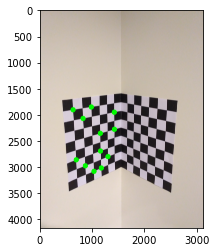

In [74]:
tr = checkboard.copy()
for i in image_points:
    cv2.circle(tr,(int(i[0]), int(i[1])),50,(0,250,0),-1)
plt.imshow(tr)



In [75]:
print(checkboard.shape[1], checkboard.shape[0])

3120 4160


In [76]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPoints=[world_points], imagePoints=[image_points], imageSize=(checkboard.shape[1], checkboard.shape[0]), cameraMatrix=None, distCoeffs=None, flags=cv2.CALIB_FIX_PRINCIPAL_POINT + cv2.CALIB_ZERO_TANGENT_DIST + cv2.CALIB_FIX_K1+ cv2.CALIB_FIX_K2 + cv2.CALIB_FIX_K3 + cv2.CALIB_FIX_K4 + cv2.CALIB_FIX_K5 + cv2.CALIB_FIX_K6)

In [80]:
data2 = [
        [629, 1904, 0, 0, 0],
        [1276, 1803, 8, 0, 0],
        [1411, 1780, 10, 0, 0],
        [1415, 2277, 10, 6, 0],
        [1147, 2354, 6, 6, 0],
        [1151, 2691, 6, 10, 0],
        [689, 2859, 0, 10, 0],
        [1002, 2572, 4, 8, 0],
        [1414, 2442, 10, 8, 0],
        [708, 3211, 0, 14, 0],
        [1419, 2899, 10, 14, 0],
        [1665, 1783, 12, 0, 2],
        [2075, 1857, 12, 0, 8],
        [1789, 1982, 12, 2, 4],
        [1922, 2013, 12, 2, 6],
        [2389, 2316, 12, 4, 12],
        [1660, 2282, 12, 6, 2],
        [2053, 2408, 12, 6, 8],
        [1779, 2486, 12, 8, 4],
        [1909, 2532, 12, 8, 6],
        [1654, 2601, 12, 10, 2],
        [1906, 2700, 12, 10, 6],
        [2351, 3057, 12, 12, 12],
        [1657, 2904, 12, 14, 2],
        [2341, 3232, 12, 14, 12]        
]

image_points_2 = np.array([item[:2] for item in data2])
world_points_2 = np.array([item[2:] for item in data2])

world_points_2 = np.array(world_points_2, dtype=np.float32)
image_points_2 = np.array(image_points_2, dtype=np.float32)

print(world_points_2)
print(world_points_2.dtype)
print(image_points_2)
print(image_points_2.dtype)

[[ 0.  0.  0.]
 [ 8.  0.  0.]
 [10.  0.  0.]
 [10.  6.  0.]
 [ 6.  6.  0.]
 [ 6. 10.  0.]
 [ 0. 10.  0.]
 [ 4.  8.  0.]
 [10.  8.  0.]
 [ 0. 14.  0.]
 [10. 14.  0.]
 [12.  0.  2.]
 [12.  0.  8.]
 [12.  2.  4.]
 [12.  2.  6.]
 [12.  4. 12.]
 [12.  6.  2.]
 [12.  6.  8.]
 [12.  8.  4.]
 [12.  8.  6.]
 [12. 10.  2.]
 [12. 10.  6.]
 [12. 12. 12.]
 [12. 14.  2.]
 [12. 14. 12.]]
float32
[[ 629. 1904.]
 [1276. 1803.]
 [1411. 1780.]
 [1415. 2277.]
 [1147. 2354.]
 [1151. 2691.]
 [ 689. 2859.]
 [1002. 2572.]
 [1414. 2442.]
 [ 708. 3211.]
 [1419. 2899.]
 [1665. 1783.]
 [2075. 1857.]
 [1789. 1982.]
 [1922. 2013.]
 [2389. 2316.]
 [1660. 2282.]
 [2053. 2408.]
 [1779. 2486.]
 [1909. 2532.]
 [1654. 2601.]
 [1906. 2700.]
 [2351. 3057.]
 [1657. 2904.]
 [2341. 3232.]]
float32


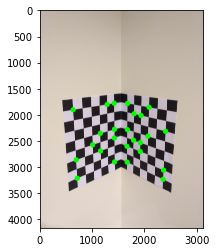

In [81]:
tr = checkboard.copy()
for i in image_points_2:
    cv2.circle(tr,(int(i[0]), int(i[1])),50,(0,255,0),-1)
plt.imshow(tr)



In [82]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPoints=[world_points_2], imagePoints=[image_points_2], imageSize=(checkboard.shape[1], checkboard.shape[0]), cameraMatrix=mtx, distCoeffs=None, flags=cv2.CALIB_FIX_PRINCIPAL_POINT + cv2.CALIB_ZERO_TANGENT_DIST + cv2.CALIB_FIX_K1+ cv2.CALIB_FIX_K2 + cv2.CALIB_FIX_K3 + cv2.CALIB_FIX_K4 + cv2.CALIB_FIX_K5 + cv2.CALIB_FIX_K6 + cv2.CALIB_USE_INTRINSIC_GUESS)

In [83]:
print("Return",ret)
print("Matrix",mtx)
print("ds",dist)
print("rvecs",rvecs)
print("tvecs",tvecs)

Return 3.9127646466485317
Matrix [[3.67875497e+03 0.00000000e+00 1.55950000e+03]
 [0.00000000e+00 3.66575353e+03 2.07950000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
ds [[0. 0. 0. 0. 0.]]
rvecs [array([[-1.12808875],
       [-0.35911778],
       [ 2.80882431]])]
tvecs [array([[  8.89900832],
       [  1.68473064],
       [-35.05026799]])]


In [84]:
rotation_matrix, _ = cv2.Rodrigues(rvecs[0])
translation_vector = tvecs[0]
extrinsics = np.hstack((rotation_matrix, translation_vector))
projection_matrix = mtx @ extrinsics
projection_matrix = projection_matrix / projection_matrix[2, 3]
mtx = mtx / mtx[2, 2]

print("Intrinsics (K):")
print(mtx)
print("\nExtrinsics (Rotation Matrix R):")
print(rotation_matrix)
print("\nExtrinsics (Translation Vector T):")
print(translation_vector)
print("\nProjection Matrix (P):")
print(projection_matrix)

Intrinsics (K):
[[3.67875497e+03 0.00000000e+00 1.55950000e+03]
 [0.00000000e+00 3.66575353e+03 2.07950000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Extrinsics (Rotation Matrix R):
[[-0.72229481  0.00100769 -0.69158456]
 [ 0.17302335 -0.96793406 -0.18211691]
 [-0.66959177 -0.25120238  0.69895939]]

Extrinsics (Translation Vector T):
[[  8.89900832]
 [  1.68473064]
 [-35.05026799]]

Projection Matrix (P):
[[ 1.05601874e+02  1.10710444e+01  4.14873560e+01  6.25490848e+02]
 [ 2.16305082e+01  1.16135576e+02 -2.24218071e+01  1.90330142e+03]
 [ 1.91037559e-02  7.16691746e-03 -1.99416277e-02  1.00000000e+00]]


In [85]:
wireframe_world_points = np.array([
                        [-2,-2,0],
                        [12,-2,0],
                        [12,-2,14],
                        [12,16,14],
                        [12,16,0],
                        [-2,16,0]
                        ])
wireframe_world_points_homogeneous = np.hstack((wireframe_world_points, np.ones((wireframe_world_points.shape[0], 1)))) 
wireframe_world_points_homogeneous = np.hstack((wireframe_world_points, np.ones((wireframe_world_points.shape[0], 1))))

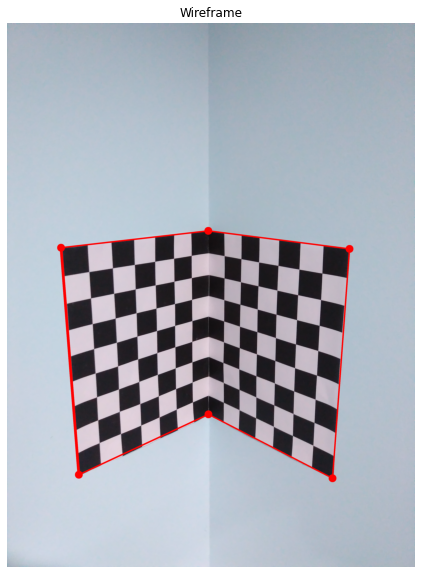

In [89]:
dst_img = checkboard.copy()

radius = 30
for i in range(len(wireframe_world_points)):
    point = projection_matrix @ wireframe_world_points_homogeneous[i]
    point = point / point[2]
    cv2.circle(dst_img, (int(point[0]), int(point[1])), radius, (0, 0, 255), -1)

    if i < len(wireframe_world_points) - 1:
        next_point = projection_matrix @ wireframe_world_points_homogeneous[i + 1]
        next_point = next_point / next_point[2]
        cv2.line(dst_img, (int(point[0]), int(point[1])), (int(next_point[0]), int(next_point[1])), (0, 0,2550), 10)

next_point = projection_matrix @ wireframe_world_points_homogeneous[0]
next_point = next_point / next_point[2]
cv2.line(dst_img, (int(point[0]), int(point[1])), (int(next_point[0]), int(next_point[1])), (0, 0,2550), 20)

plt.imshow(cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB))
plt.title('Wireframe')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

RRRR


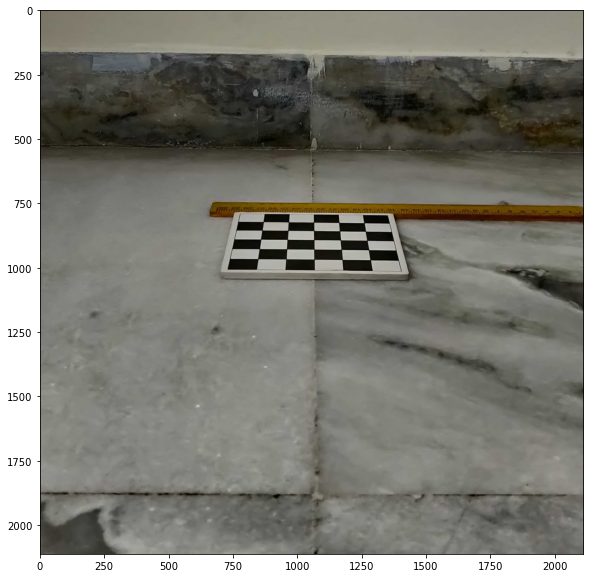

In [92]:
checkboard2 = cv2.imread('./assign1.jpg')
checkboard2 = cv2.cvtColor(checkboard2, cv2.COLOR_BGR2RGB)
#increase the size of the plot
plt.figure(figsize=(10,10))
plt.imshow(checkboard2)

In [93]:
ret2, corners1_2 = cv2.findChessboardCorners(checkboard2, (5,5),None)

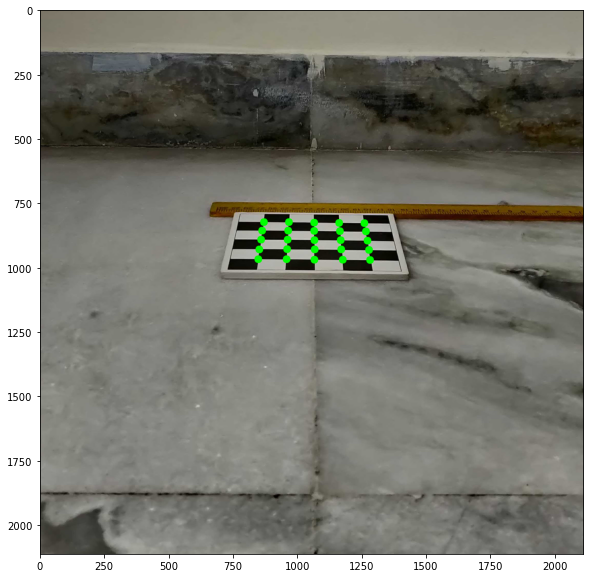

In [98]:
tt11 = checkboard2.copy()
for i in corners1_2:
    cv2.circle(tt11,(int(i[0][0]), int(i[0][1])),15,(0,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(tt11)

In [107]:
corr_points_2 = []
z = 0

for k in [corners1_2]:
    for i in range(5): # 8 rows
        t = k[i*5:i*5+5] # 6 points in each row
        
        if k is corners1_2:
            for j in range(len(t)):
                corr_points_2.append((int(t[j][0][0]), int(t[j][0][1]),j*2, i*2, z))
    z +=12


In [108]:
for i in corr_points_2:
    print(i)

(869, 823, 0, 0, 0)
(966, 823, 2, 0, 0)
(1064, 825, 4, 0, 0)
(1161, 826, 6, 0, 0)
(1259, 827, 8, 0, 0)
(862, 856, 0, 2, 0)
(963, 856, 2, 2, 0)
(1064, 857, 4, 2, 0)
(1164, 858, 6, 2, 0)
(1265, 859, 8, 2, 0)
(858, 891, 0, 4, 0)
(961, 891, 2, 4, 0)
(1065, 893, 4, 4, 0)
(1167, 893, 6, 4, 0)
(1271, 895, 8, 4, 0)
(851, 929, 0, 6, 0)
(959, 928, 2, 6, 0)
(1066, 929, 4, 6, 0)
(1169, 929, 6, 6, 0)
(1277, 931, 8, 6, 0)
(847, 967, 0, 8, 0)
(957, 967, 2, 8, 0)
(1065, 969, 4, 8, 0)
(1175, 969, 6, 8, 0)
(1281, 970, 8, 8, 0)


In [109]:
data3 = [
        [869, 823, 0, 0, 0],
        [966, 823, 2, 0, 0],
        [1064, 825, 4, 0, 0],
        [1161, 826, 6, 0, 0],
        [1259, 827, 8, 0, 0],
        [862, 856, 0, 2, 0],
        [963, 856, 2, 2, 0],
        [1064, 857, 4, 2, 0],
        [1164, 858, 6, 2, 0],
        [1265, 859, 8, 2, 0],
        [858, 891, 0, 4, 0],
        [961, 891, 2, 4, 0],
        [1065, 893, 4, 4, 0],
        [1167, 893, 6, 4, 0],
        [1271, 895, 8, 4, 0],
        [851, 929, 0, 6, 0],
        [959, 928, 2, 6, 0],
        [1066, 929, 4, 6, 0],
        [1169, 929, 6, 6, 0],
        [1277, 931, 8, 6, 0],
        [847, 967, 0, 8, 0],
        [957, 967, 2, 8, 0],
        [1065, 969, 4, 8, 0],
        [1175, 969, 6, 8, 0],
        [1281, 970, 8, 8, 0]
]

image_points_3 = np.array([item[:2] for item in data3])
world_points_3 = np.array([item[2:] for item in data3])

world_points_3 = np.array(world_points_3, dtype=np.float32)
image_points_3 = np.array(image_points_3, dtype=np.float32)

print(world_points_3)
print(world_points_3.dtype)
print(image_points_3)
print(image_points_3.dtype)

[[0. 0. 0.]
 [2. 0. 0.]
 [4. 0. 0.]
 [6. 0. 0.]
 [8. 0. 0.]
 [0. 2. 0.]
 [2. 2. 0.]
 [4. 2. 0.]
 [6. 2. 0.]
 [8. 2. 0.]
 [0. 4. 0.]
 [2. 4. 0.]
 [4. 4. 0.]
 [6. 4. 0.]
 [8. 4. 0.]
 [0. 6. 0.]
 [2. 6. 0.]
 [4. 6. 0.]
 [6. 6. 0.]
 [8. 6. 0.]
 [0. 8. 0.]
 [2. 8. 0.]
 [4. 8. 0.]
 [6. 8. 0.]
 [8. 8. 0.]]
float32
[[ 869.  823.]
 [ 966.  823.]
 [1064.  825.]
 [1161.  826.]
 [1259.  827.]
 [ 862.  856.]
 [ 963.  856.]
 [1064.  857.]
 [1164.  858.]
 [1265.  859.]
 [ 858.  891.]
 [ 961.  891.]
 [1065.  893.]
 [1167.  893.]
 [1271.  895.]
 [ 851.  929.]
 [ 959.  928.]
 [1066.  929.]
 [1169.  929.]
 [1277.  931.]
 [ 847.  967.]
 [ 957.  967.]
 [1065.  969.]
 [1175.  969.]
 [1281.  970.]]
float32


In [110]:
ret22, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera([world_points_3], [image_points_3], (checkboard2.shape[1], checkboard2.shape[0]), None, None)

In [111]:
rotation_matrix2, _ = cv2.Rodrigues(rvecs2[0])
translation_vector2 = tvecs2[0]
extrinsics2 = np.hstack((rotation_matrix2, translation_vector2))
projection_matrix2 = mtx2 @ extrinsics2

print("Intrinsics (K):")
print(mtx2)
print("\nExtrinsics (Rotation Matrix R):")
print(rotation_matrix2)
print("\nExtrinsics (Translation Vector T):")
print(translation_vector2)
print("\nProjection Matrix (P):")
print(projection_matrix2)

Intrinsics (K):
[[1.81761943e+03 0.00000000e+00 1.07425628e+03]
 [0.00000000e+00 6.85615024e+02 9.09893705e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Extrinsics (Rotation Matrix R):
[[ 0.99704161  0.00643806 -0.07659354]
 [ 0.02153689  0.93316993  0.3587897 ]
 [ 0.0737847  -0.35937785  0.93027059]]

Extrinsics (Translation Vector T):
[[-4.20319634]
 [-4.73226216]
 [36.7740786 ]]

Projection Matrix (P):
[[ 1.89150589e+03 -3.74361972e+02  8.60131115e+02  3.18649737e+04]
 [ 8.19022483e+01  3.12799676e+02  1.09243897e+03  3.02159926e+04]
 [ 7.37847024e-02 -3.59377852e-01  9.30270594e-01  3.67740786e+01]]


In [114]:
wireframe_world_points2 = np.array([[-2, -2, 0], [10, -2, 0], [10, 10, 0], [-2, 10, 0]])
wireframe_world_points2_homogeneous = np.hstack((wireframe_world_points2, np.ones((wireframe_world_points2.shape[0], 1)))) 
wireframe_world_points2_homogeneous = np.hstack((wireframe_world_points2, np.ones((wireframe_world_points2.shape[0], 1))))

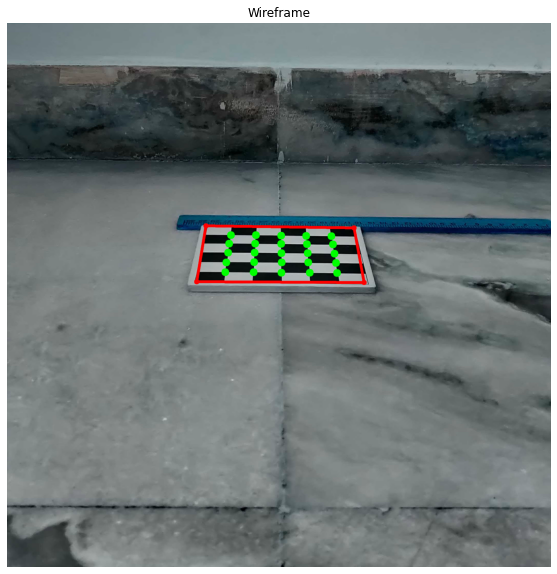

In [119]:
dst_img = checkboard2.copy()

for i in range(len(wireframe_world_points2)):
    point = projection_matrix2 @ wireframe_world_points2_homogeneous[i]
    point = point / point[2]
    cv2.circle(dst_img, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)

    if i < len(wireframe_world_points2) - 1:
        next_point = projection_matrix2 @ wireframe_world_points2_homogeneous[i + 1]
        next_point = next_point / next_point[2]
        cv2.line(dst_img, (int(point[0]), int(point[1])), (int(next_point[0]), int(next_point[1])), (0, 0,2550), 10)

next_point = projection_matrix2 @ wireframe_world_points2_homogeneous[0]
next_point = next_point / next_point[2]
cv2.line(dst_img, (int(point[0]), int(point[1])), (int(next_point[0]), int(next_point[1])), (0, 0,2550), 10)


for i in corners1_2:
    cv2.circle(dst_img,(int(i[0][0]), int(i[0][1])),15,(0,255,0),-1)

plt.imshow(cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB))
plt.title('Wireframe')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

Origin is consistent with what I expect